# <b>HR Analytics</b>

* <b>Author:-</b> Sunil Sharanappa
* <b>Linked in:</b>- https://www.linkedin.com/in/sunil-sharanappa/
* <b>Github:-</b> https://github.com/dataisamazing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')

## <b>EDA </b>

In [2]:
df=pd.read_csv("/content/train.csv")

#### <b>Meta Data information</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### <b> Setting the employee id as index column</b>

In [3]:
df.set_index('employee_id',inplace=True)
# df=df.drop('employee_id',axis=1)

### <b> Finding out the number of labels in each column to figure out which all are categorical columns </b>

In [4]:
# let's have a look at how many labels each variable has
for col in df.columns:
    print(col, ': ', len(df[col].unique()), ' labels')

department :  9  labels
region :  34  labels
education :  4  labels
gender :  2  labels
recruitment_channel :  3  labels
no_of_trainings :  10  labels
age :  41  labels
previous_year_rating :  6  labels
length_of_service :  35  labels
KPIs_met >80% :  2  labels
awards_won? :  2  labels
avg_training_score :  61  labels
is_promoted :  2  labels


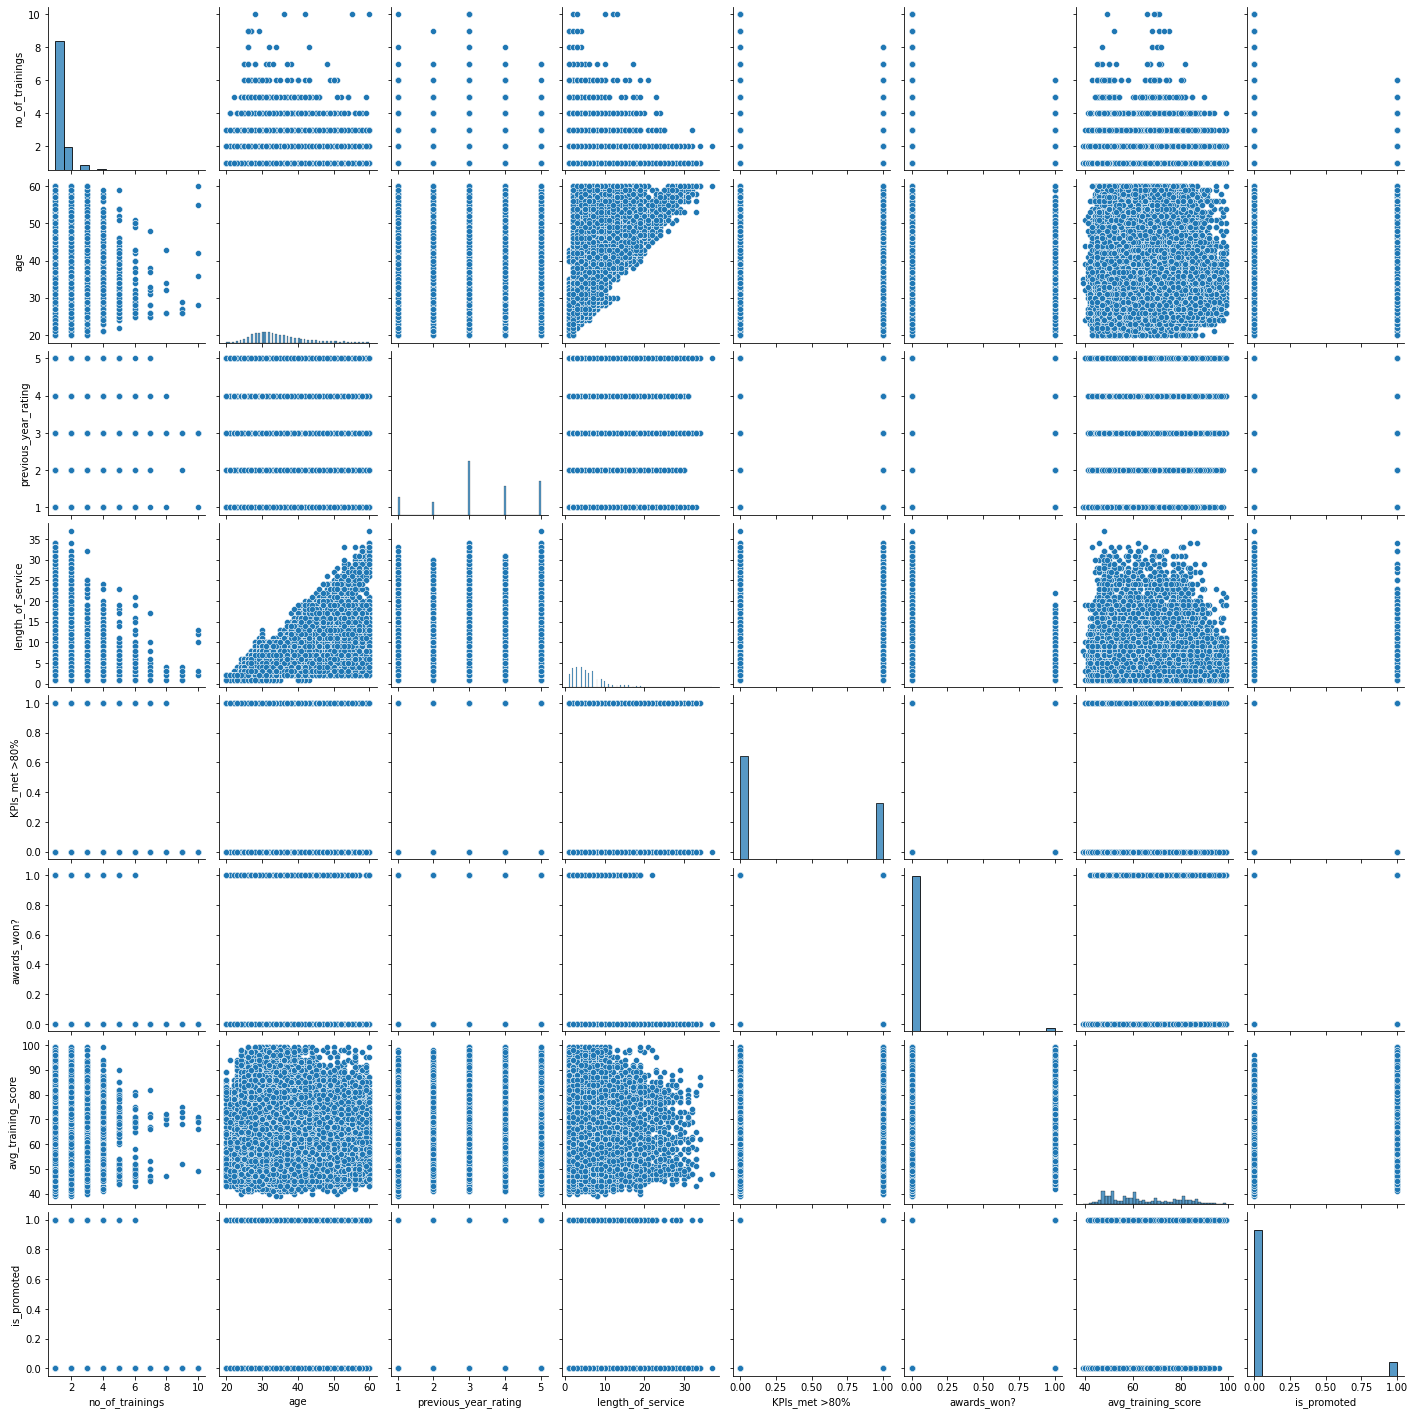

In [ ]:
sns.pairplot(df)

### <b> Heat map to find the corelations<b>

(8.5, -0.5)

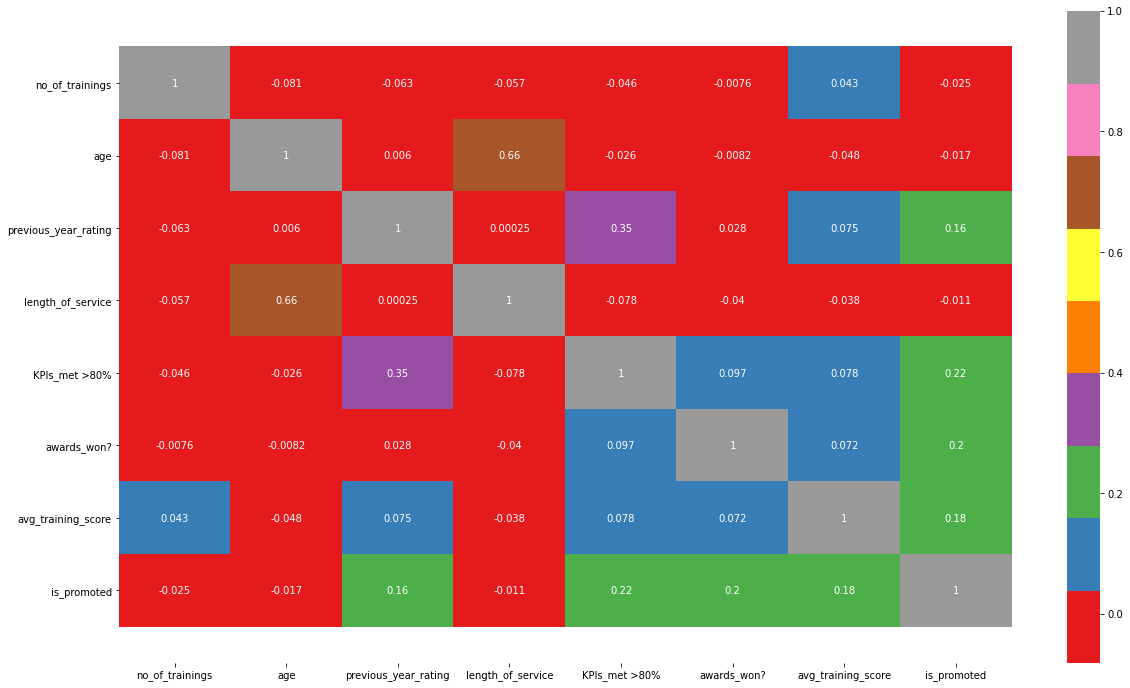

In [ ]:
corr_matirx=df.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

### <b> Bar chart which shows the correlation of each column on the target column </b>

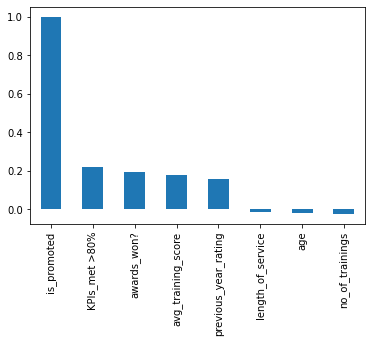

In [ ]:
df.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')

### <b> This is a quiet Imbalanced data:-
* 91.48% employee dont get promotion
* 8.52% gets promotion

In [5]:
transaction_classes=df['is_promoted'].value_counts()
Not_promoted=round(transaction_classes[0]/df['is_promoted'].count()*100,2)
promoted=round(transaction_classes[1]/df['is_promoted'].count()*100, 2)
print("Percentage of people who are NOT promoted ",Not_promoted,"%")
print("Percentage of people who are promoted",promoted,"%")     

Percentage of people who are NOT promoted  91.48 %
Percentage of people who are promoted 8.52 %


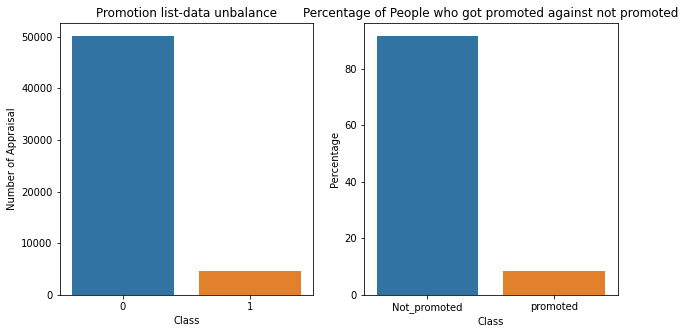

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df["is_promoted"])
plt.ylabel("Number of Appraisal")
plt.xlabel("Class")
plt.title("Promotion list-data unbalance")

plt.subplot(1,2,2)
promoted_percentage = {'Class':['Not_promoted', 'promoted'], 'Percentage':[Not_promoted, promoted]} 
df_promoted_percentage = pd.DataFrame(promoted_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_promoted_percentage)
plt.title('Percentage of People who got promoted against not promoted')
plt.show()

#### <b>Scatter plot to of Independent VS Dependent variables</b>

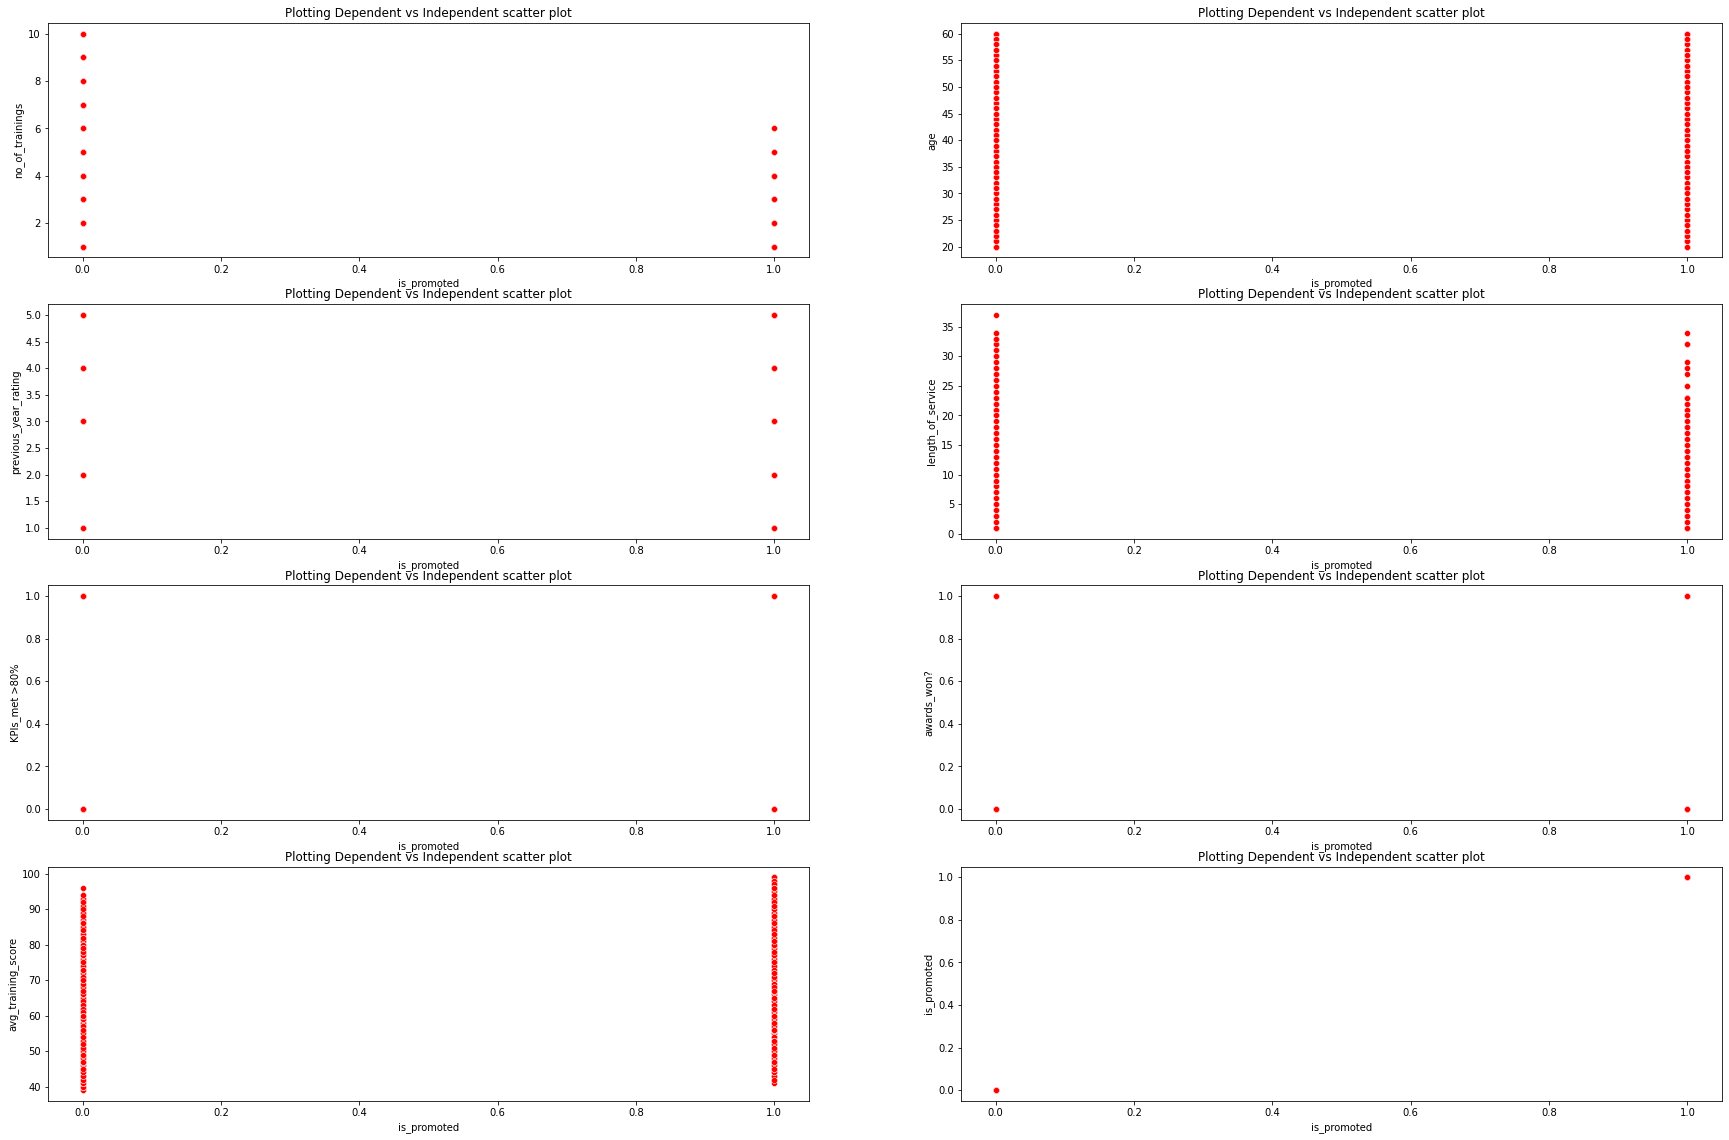

In [ ]:
dfObject=(df.dtypes[df.dtypes!='object'].index)
var = dfObject
plt.figure(figsize=(30,25))
i=0
for col in var:
    i += 1
    plt.subplot(5,2, i)
    sns.scatterplot(df["is_promoted"],df[col],color='red')
    plt.title("Plotting Dependent vs Independent scatter plot")    
plt.show()

### <b> Displot of Dependent varaibles vs Independent Continous variables.

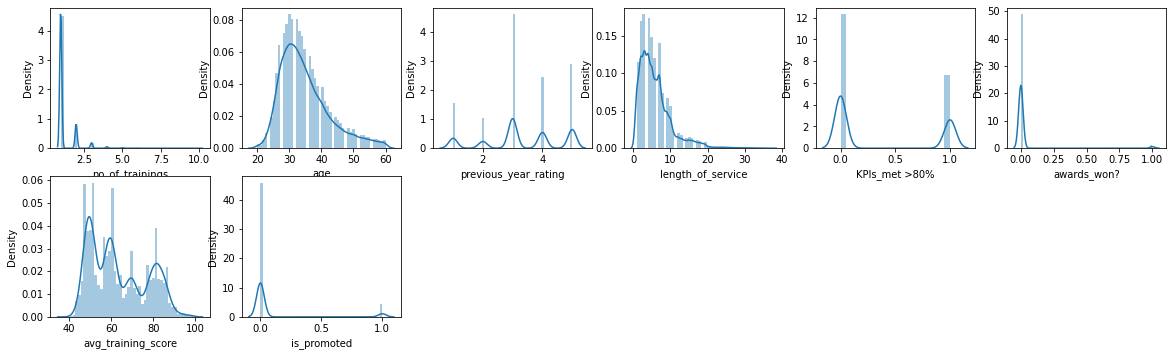

In [ ]:
var = dfObject
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(df[col])
plt.show()

### Below gives an Idea about how much percentage of promotion each department has got.

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in categorical_features:
    data=df.copy()
    print("**************************************************************************************************")
    print("\n",data.groupby([feature,'is_promoted'])['is_promoted'].count()/df.groupby([feature])['is_promoted'].count()*100)


**************************************************************************************************

 department         is_promoted
Analytics          0              90.433483
                   1               9.566517
Finance            0              91.876972
                   1               8.123028
HR                 0              94.375517
                   1               5.624483
Legal              0              94.898941
                   1               5.101059
Operations         0              90.985196
                   1               9.014804
Procurement        0              90.361446
                   1               9.638554
R&D                0              93.093093
                   1               6.906907
Sales & Marketing  0              92.796912
                   1               7.203088
Technology         0              89.240684
                   1              10.759316
Name: is_promoted, dtype: float64
******************************************

The feature is department and number of categories are 9
The feature is region and number of categories are 34
The feature is education and number of categories are 4
The feature is gender and number of categories are 2
The feature is recruitment_channel and number of categories are 3


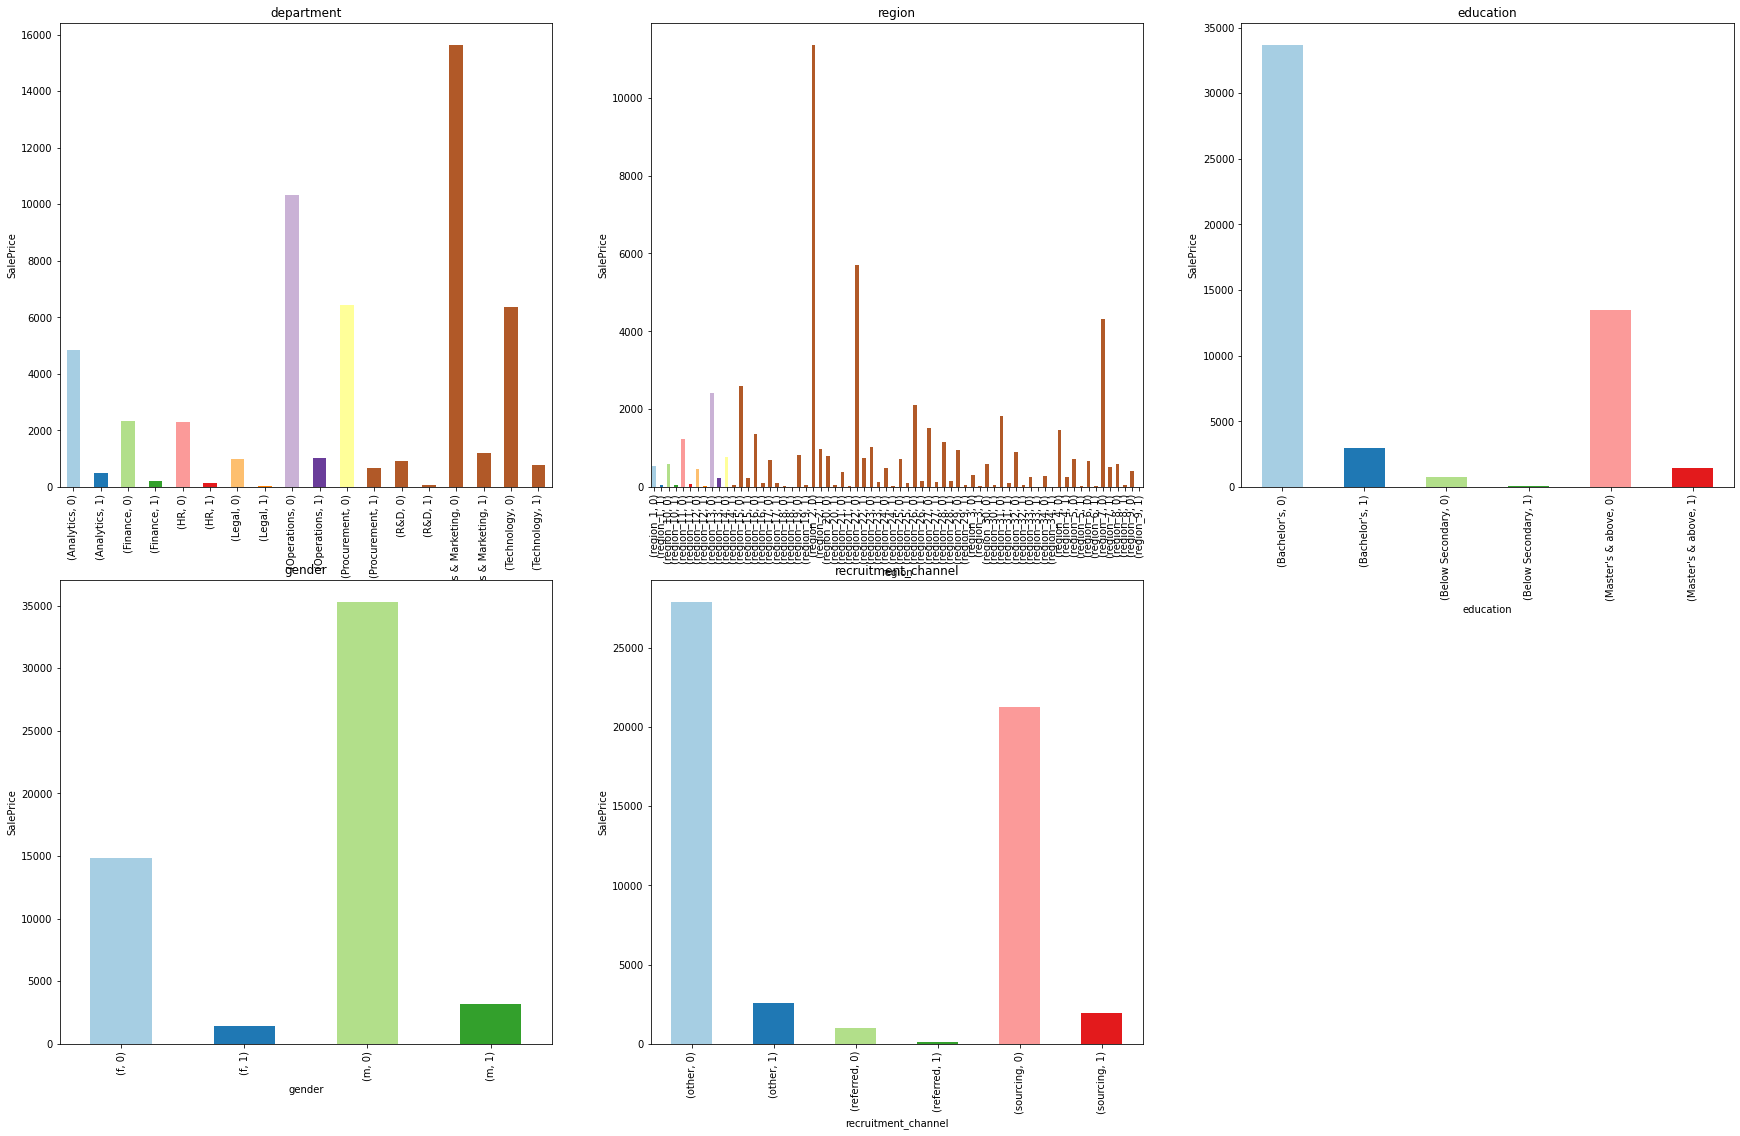

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

plt.figure(figsize=(30,70))
i=0
for feature in categorical_features:
    data=df.copy()
    bpplot=data.groupby([feature,'is_promoted'])['is_promoted'].count()
    if i!=24:
        plt.subplot(7,3,i+1) 
        bpplot.plot.bar(color=plt.cm.Paired(np.arange(len(data))))
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        i=i+1 

### <b> Percentage of missing values from each column</b>

In [ ]:
 round((df.isnull().sum()/len(df.index))*100,2)[round((df.isnull().sum()/len(df.index))*100,2).values>0.0]

education               4.40
previous_year_rating    7.52
dtype: float64

### <b>Below chart shows how much missing values has affected the target variable.</b> 
* 0 --> missing value.
* 999 --> non missing values.

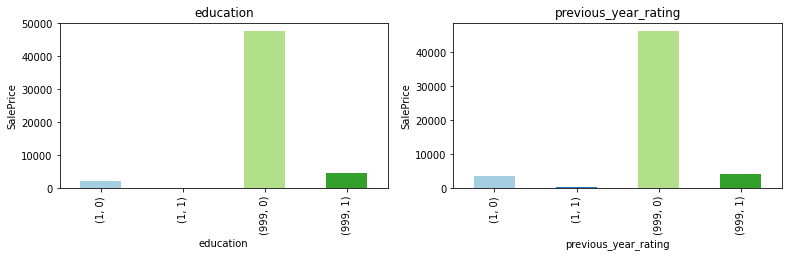

In [ ]:
plt.figure(figsize=(20,25))
i=0
LabelName_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in LabelName_with_na:
    data = df.copy()    
    # let's make a variable that indicates 1 if the observation was missing or 999 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 999)
     # let's calculate the mean SalePrice where the information is missing or present
    bpplot=data.groupby([feature,'is_promoted'])['is_promoted'].count()
    if i!=24:
        plt.subplot(7,3,i+1) 
        bpplot.plot.bar(color=plt.cm.Paired(np.arange(len(data))))
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        i=i+1

### <b>Label Encoding</b>

In [6]:
# Imputing the missing values of previou_year rating with the median values.
df['previous_year_rating'][df['previous_year_rating'].isnull()]=3
df['gender'].replace(['f', 'm'], [0,1], inplace = True) 

### Making the missing value under education as "Bachelor\'s" label.

In [7]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round((df[feature].isnull().mean())*100,4)))


## Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Bachelor\'s')
    return data

df=replace_cat_feature(df,features_nan)
print("*****************************************")
print(df[features_nan].isnull().sum())

education: 4.3953% missing values
*****************************************
education    0
dtype: int64


In [8]:
df.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

### <b> ONE HOT ENCODING </b>

In [9]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
dummy1=pd.get_dummies(df[categorical_features],drop_first=True)

df.drop(df[categorical_features], axis=1, inplace=True)
df01 = pd.concat([df, dummy1], axis = 1)
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        54808 non-null  int64  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   is_promoted                   54808 non-null  int64  
 9   department_Finance            54808 non-null  uint8  
 10  department_HR                 54808 non-null  uint8  
 11  department_Legal              54808 non-null  uint8  
 12  department_Operations         54808 non-null  uint8  
 1

### <b> Building Model</b>

In [10]:
y = df01.pop('is_promoted')
X = df01
# Splitting 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(43846, 53)
(10962, 53)


###  <b> Method 01:- Checking on some classification algoriths before Hyper parameter tunning </b>

In [11]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.929389 (0.001976)
LDA: 0.933609 (0.001528)
KNN: 0.920061 (0.001626)
Decision Tree: 0.896957 (0.003893)
NB: 0.574831 (0.063747)
XGB: 0.936072 (0.001845)


### <b>Method 02:- Choosing Logistic Regression Since it's giving good Accuracy and Then doing Hyper parmeter tunning on it</b>

In [12]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   17.0s finished


Best ROC AUC score:  0.8262839406992326
Best hyperparameters:  {'C': 0.01}


#### <b> plotting the results from Grid search Cv </b>

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

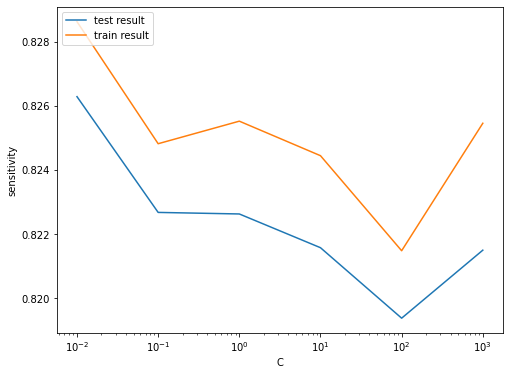

In [13]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

### <b> Predicting the accuracy and F1 score on Train set</b>

In [14]:
# Creating function to show ROC-AUC score, f1 score and classification report

def show_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)
show_scores(y_train, y_train_pred)

F1 Score: 13.02%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     40099
           1       0.78      0.07      0.13      3747

    accuracy                           0.92     43846
   macro avg       0.85      0.53      0.54     43846
weighted avg       0.91      0.92      0.89     43846



### <b> Predicting the accuracy and F1 score on Test set</b>

In [15]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_test)
show_scores(y_test, y_train_pred)

F1 Score: 15.57%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     10041
           1       0.84      0.09      0.16       921

    accuracy                           0.92     10962
   macro avg       0.88      0.54      0.56     10962
weighted avg       0.92      0.92      0.89     10962



### <b> ROC curve on Train set </b>

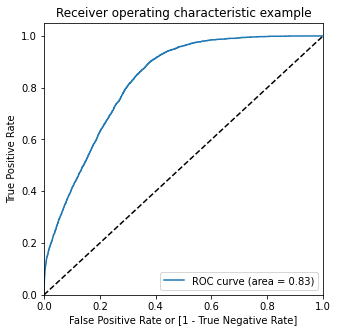

In [16]:
from sklearn import metrics
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

    # Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### <b>ROC curve on Test Set</b>

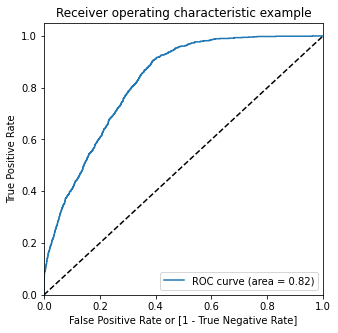

In [17]:
    # Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_train_pred_proba)

### <b> Method-3 Using XGBoost </b>

In [18]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

#perform cross validation
XGmodel_cv = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=4,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
XGmodel_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', XGmodel_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', XGmodel_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.1min finished


Best ROC AUC score:  0.9104556800371238
Best hyperparameters:  {'C': 0.01}


XGBClassifier(C=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=27,
              silent=None, subsample=0.8, verbosity=1)

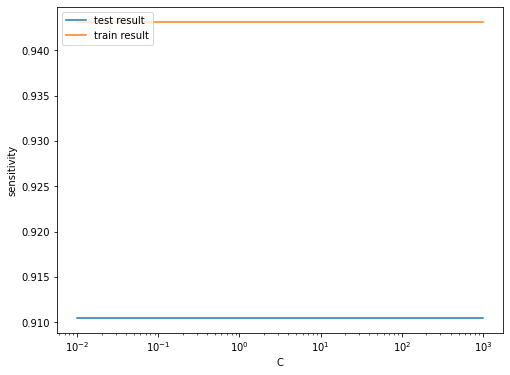

In [19]:
# cross validation results
XGcv_results = pd.DataFrame(XGmodel_cv.cv_results_)

# plotting of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(XGcv_results['param_C'], XGcv_results['mean_test_score'])
plt.plot(XGcv_results['param_C'], XGcv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

# Instantiating the model with best C
xgboos_imb_model = XGBClassifier(C=0.01,learning_rate=0.1,n_estimators=150, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27)

# Fitting the model on train dataset
xgboos_imb_model.fit(X_train, y_train)

### <b> Predicting the accuracy and F1 score on Test set</b>

In [20]:
# Creating function to show ROC-AUC score, f1 score and classification report

def show_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

# Predictions on the train set
y_train_pred = xgboos_imb_model.predict(X_train)
show_scores(y_train, y_train_pred)

F1 Score: 58.77%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     40099
           1       0.71      0.50      0.59      3747

    accuracy                           0.94     43846
   macro avg       0.83      0.74      0.78     43846
weighted avg       0.93      0.94      0.94     43846



### <b> Predicting the accuracy and F1 score on Train set</b>

In [21]:
# Predictions on the train set
y_train_pred = xgboos_imb_model.predict(X_test)
show_scores(y_test, y_train_pred)

F1 Score: 53.93%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     10041
           1       0.65      0.46      0.54       921

    accuracy                           0.93     10962
   macro avg       0.80      0.72      0.75     10962
weighted avg       0.93      0.93      0.93     10962



### <b> ROC curve on Train set</b>

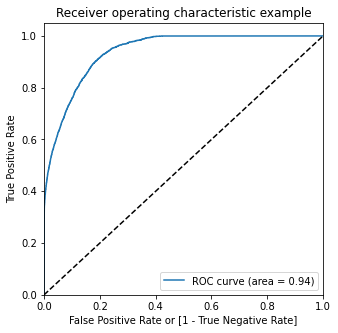

In [22]:
from sklearn import metrics
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

    # Predicted probability
y_train_pred_proba = xgboos_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

### <b> ROC curve on Test set</b>

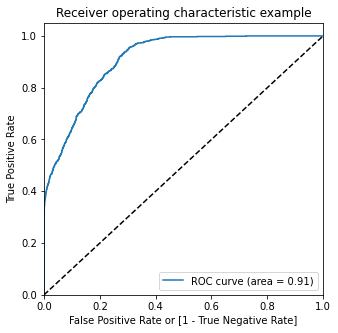

In [23]:
# Predicted probability
y_train_pred_proba = xgboos_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_train_pred_proba)

# <b><u> Prediction on Unseen Test Set</u></b>

In [25]:
dftest=pd.read_csv("/content/test.csv")
dftest.set_index('employee_id',inplace=True)
#dftest=dftest.drop('employee_id',axis=1)
dftest['previous_year_rating'][dftest['previous_year_rating'].isnull()]=3
dftest['gender'].replace(['f', 'm'], [0,1], inplace = True) 

features_nan=[feature for feature in dftest.columns if dftest[feature].isnull().sum()>1 and dftest[feature].dtypes=='O']
for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round((dftest[feature].isnull().mean())*100,4)))

## Replace missing value with a new label
def replace_cat_feature(dftest,features_nan):
    data=dftest.copy()
    data[features_nan]=data[features_nan].fillna('Bachelor\'s')
    return data

dftest=replace_cat_feature(dftest,features_nan)
print("*****************************************")
print(dftest[features_nan].isnull().sum())

categorical_features=[feature for feature in dftest.columns if dftest[feature].dtypes=='O']
dummy2=pd.get_dummies(dftest[categorical_features],drop_first=True)

dftest.drop(dftest[categorical_features], axis=1, inplace=True)
dftest01 = pd.concat([dftest, dummy2], axis = 1)

education: 4.4019% missing values
*****************************************
education    0
dtype: int64


### <b> Prediction on Test data fitting Logistic regression modal</b>

In [27]:
from google.colab import files
y_train_pred = log_reg_imb_model.predict(dftest01.values)
y_train_pred
dffinal=pd.DataFrame(y_train_pred) 

dffinal.rename(columns={ dffinal.columns[0]: "is_promoted_from_test_LGR" }, inplace = True)

dffinal.to_csv('FinalTestPredictionLogistic.csv')
files.download('FinalTestPredictionLogistic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <b> Prediction on Test data fitting XGboost modal</b>

In [28]:
from google.colab import files
y_train_pred = xgboos_imb_model.predict(dftest01)
y_train_pred
dffinal=pd.DataFrame(y_train_pred) 

dffinal.rename(columns={ dffinal.columns[0]: "is_promoted_from_test_XGboost" }, inplace = True)

dffinal.to_csv('FinalTestPredictionXGboost.csv')
files.download('FinalTestPredictionXGboost.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <b>Conclusion:-</b>
* Logistic Regression is the best modal.
* When the Logistic Regression modal is run on the Test.csv only 192 records are not predicted correctly.  